In [1]:
import os
import PIL## Handaling Images Using Python
import shutil ## High level File  Operation
import pathlib ##3 Working With File PAths In System
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,save_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization


In [2]:
data_dir="D:/Image_Classification/Data/archive/flowers"

In [3]:
type(data_dir)

str

In [4]:
data_dir=pathlib.Path(data_dir)

In [5]:
images_count=len(list(data_dir.glob("*/*.jpg")))

In [6]:
images_count

15740

## Simple CNN Architeture

In [7]:
batch_size=32
img_height=180
img_width=180

In [8]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 15740 files belonging to 16 classes.
Using 12592 files for training.


In [9]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 15740 files belonging to 16 classes.
Using 3148 files for validation.


In [10]:
class_names=train_ds.class_names
print("Class Name:",class_names)
train_ds=train_ds.cache().shuffle(1000)
val_ds=val_ds.cache().shuffle(1000)

Class Name: ['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'daffodil', 'dandelion', 'iris', 'magnolia', 'rose', 'sunflower', 'tulip', 'water_lily']


In [11]:
num_classes=len(class_names)
num_classes

16

In [12]:
## modeling
model=Sequential([
    layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(num_classes)## You Can Also Right activation="Softmax" but we define below
])


c:\Users\sachi\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,990,704 (15.22 MB)

 Trainable params: 3,990,704 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
epochs=10
history=model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 155s 302ms/step - accuracy: 0.2980 - loss: 2.1206 - val_accuracy: 0.4971 - val_loss: 1.4951
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 128s 326ms/step - accuracy: 0.5720 - loss: 1.2694 - val_accuracy: 0.5835 - val_loss: 1.2524
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 102s 258ms/step - accuracy: 0.7202 - loss: 0.8407 - val_accuracy: 0.6360 - val_loss: 1.1120
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 107s 273ms/step - accuracy: 0.8238 - loss: 0.5128 - val_accuracy: 0.6204 - val_loss: 1.2150
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 96s 243ms/step - accuracy: 0.9096 - loss: 0.2869 - val_accuracy: 0.6366 - val_loss: 1.4353
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 96s 245ms/step - accuracy: 0.9544 - loss: 0.1486 - val_accuracy: 0.6296 - val_loss: 1.6275
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 175s 445ms/step - accuracy: 0.9746 - loss: 0.0850 - val_accuracy: 0.6452 - val_loss: 1.9492
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 99s 252ms/step - accuracy: 0.9823 - lo

In [16]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs_range=range(epochs)

Text(0.5, 1.0, 'Training and Validation Accuracy')

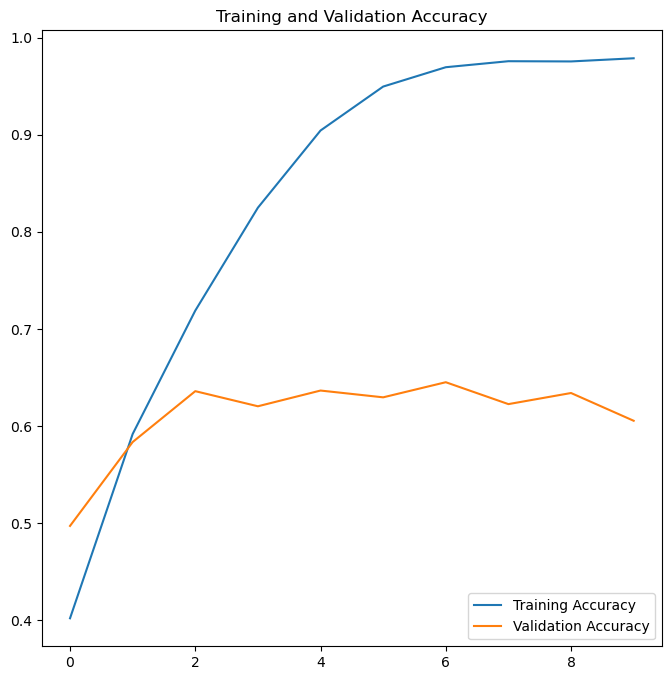

In [17]:
plt.figure(figsize=(8,8))

plt.plot(epochs_range,acc,label="Training Accuracy")

plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Accuracy')

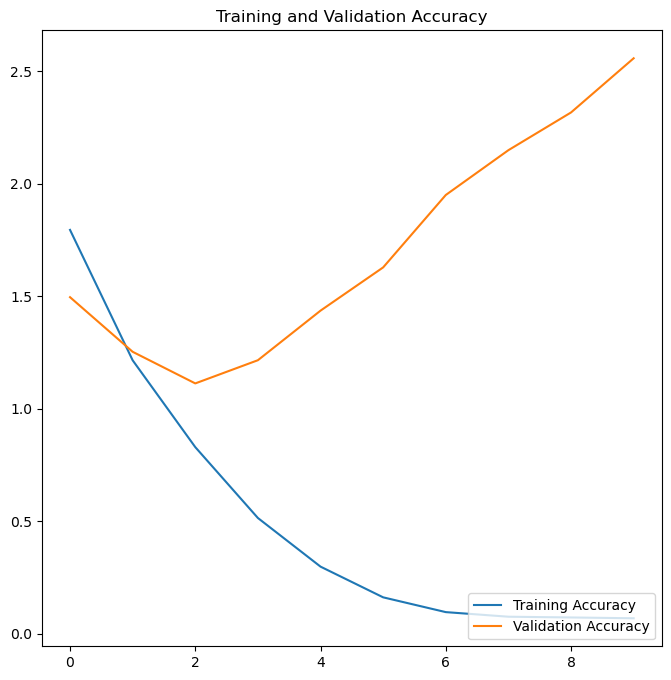

In [18]:
plt.figure(figsize=(8,8))

plt.plot(epochs_range,loss,label="Training Accuracy")

plt.plot(epochs_range,val_loss,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

In [19]:
data_dir

WindowsPath('D:/Image_Classification/Data/archive/flowers')

## Training Using Tranfer Learning(DenseNet121)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
datagen = ImageDataGenerator( rescale = 1.0/255.,
                                  rotation_range=30 ,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  brightness_range=[0.6,1],
                                  fill_mode='nearest',
                                  validation_split=0.2)
train_generator = datagen.flow_from_directory(data_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150),
                                                    subset='training' )
val_generator = datagen.flow_from_directory(data_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150),
                                                    shuffle=False,
                                                    subset='validation' )

Found 12599 images belonging to 16 classes.
Found 3141 images belonging to 16 classes.


In [21]:
train_generator.class_indices

{'astilbe': 0,
 'bellflower': 1,
 'black_eyed_susan': 2,
 'calendula': 3,
 'california_poppy': 4,
 'carnation': 5,
 'common_daisy': 6,
 'coreopsis': 7,
 'daffodil': 8,
 'dandelion': 9,
 'iris': 10,
 'magnolia': 11,
 'rose': 12,
 'sunflower': 13,
 'tulip': 14,
 'water_lily': 15}

In [22]:
# feature extractor
denseNet = tf.keras.applications.DenseNet121( include_top=False,
                                             weights="imagenet",
                                             input_shape=(150, 150, 3))
#freeze the base model [denseNet]
denseNet.trainable = False
#add the classifier
model=tf.keras.models.Sequential()
model.add(denseNet)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ ?                      │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)
epoch = 10
history = model.fit(train_generator, epochs = epoch, validation_data = val_generator, verbose = 1)

Epoch 1/10


c:\Users\sachi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


394/394 ━━━━━━━━━━━━━━━━━━━━ 566s 1s/step - accuracy: 0.4444 - loss: 2.0018 - val_accuracy: 0.7727 - val_loss: 0.7569
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 1254s 3s/step - accuracy: 0.7461 - loss: 0.8094 - val_accuracy: 0.7934 - val_loss: 0.6673
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 450s 1s/step - accuracy: 0.7989 - loss: 0.6188 - val_accuracy: 0.8141 - val_loss: 0.6063
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 460s 1s/step - accuracy: 0.8328 - loss: 0.5473 - val_accuracy: 0.8319 - val_loss: 0.5868
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 453s 1s/step - accuracy: 0.8479 - loss: 0.4920 - val_accuracy: 0.8399 - val_loss: 0.5490
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 480s 1s/step - accuracy: 0.8582 - loss: 0.4435 - val_accuracy: 0.8430 - val_loss: 0.5250
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 487s 1s/step - accuracy: 0.8778 - loss: 0.3876 - val_accuracy: 0.8415 - val_loss: 0.5396
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 482s 1s/step - accuracy: 0.8704 - loss: 0.4132 - val_accuracy: 0.85

In [25]:
model.save("Flower_Image_Classification_For_5_Classes.h5")

In [26]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs_range=range(10)

Text(0.5, 1.0, 'Training and Validation Accuracy')

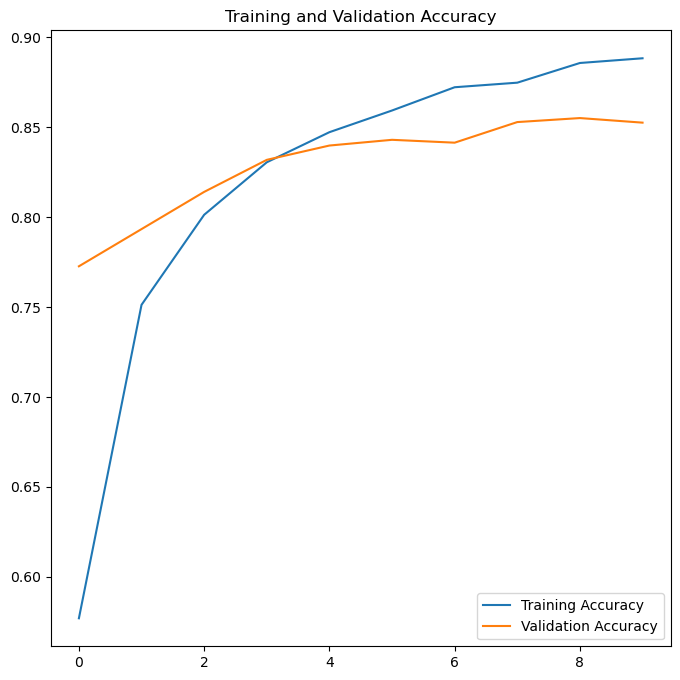

In [27]:
plt.figure(figsize=(8,8))

plt.plot(epochs_range,acc,label="Training Accuracy")

plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Loss')

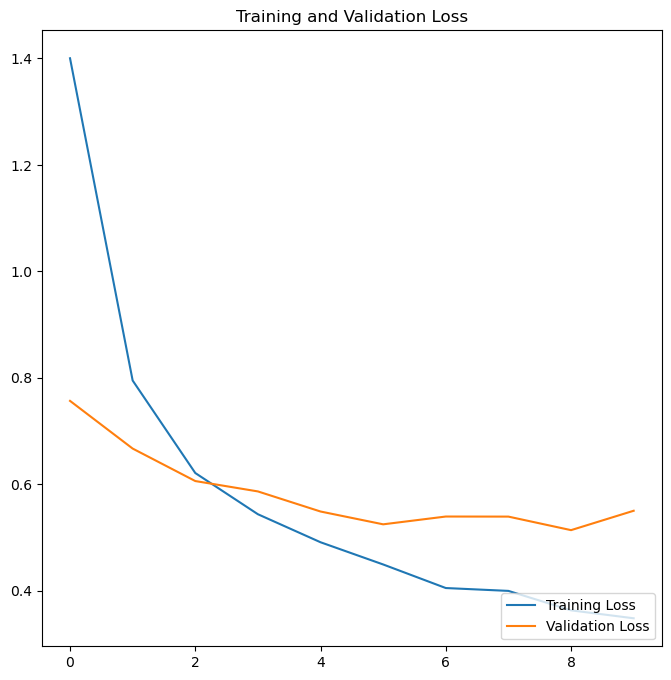

In [28]:
plt.figure(figsize=(8,8))

plt.plot(epochs_range,loss,label="Training Loss")

plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")